In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings(action='ignore')

total_df = pd.read_csv('/Users/songsooyeoun/Desktop/git_test/streamlit/project1/data/seoul_real_estate.csv')
total_df["CTRT_DAY"] = pd.to_datetime(total_df["CTRT_DAY"], format="%Y-%m-%d")
types = list(total_df['BLDG_USG'].unique())
print(types)

['아파트', '단독다가구', '연립다세대', '오피스텔']


/Users/songsooyeoun/Desktop/git_test/streamlit/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
periods = 28 # 향후 28일간 예측을 한다고 설정

model = Prophet()
total_df2 = total_df.loc[total_df['BLDG_USG']==types[0], ['CTRT_DAY', 'THING_AMT']]
result_df = total_df2.groupby('CTRT_DAY')['THING_AMT'].agg('mean').reset_index()
result_df = result_df.rename(columns={'CTRT_DAY':'ds', 'THING_AMT':'y'})
model.fit(result_df)
future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future)
forecast.tail()

15:57:55 - cmdstanpy - INFO - Chain [1] start processing
15:57:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
63,2025-04-15,84400.830199,62047.608086,90039.054321,84321.025115,84485.892349,-8407.494365,-8407.494365,-8407.494365,-8407.494365,-8407.494365,-8407.494365,0.0,0.0,0.0,75993.335834
64,2025-04-16,83406.523324,72374.014493,100430.180211,83322.084225,83498.153100,3031.766655,3031.766655,3031.766655,3031.766655,3031.766655,3031.766655,0.0,0.0,0.0,86438.289979
65,2025-04-17,82412.216450,75629.158149,103160.264571,82322.636061,82509.802060,7199.673544,7199.673544,7199.673544,7199.673544,7199.673544,7199.673544,0.0,0.0,0.0,89611.889994
66,2025-04-18,81417.909575,75671.479670,101986.103731,81322.768568,81521.010730,7835.353070,7835.353070,7835.353070,7835.353070,7835.353070,7835.353070,0.0,0.0,0.0,89253.262645
67,2025-04-19,80423.602700,64437.162145,91961.143562,80323.158628,80532.793179,-2125.284854,-2125.284854,-2125.284854,-2125.284854,-2125.284854,-2125.284854,0.0,0.0,0.0,78298.317846


16:06:59 - cmdstanpy - INFO - Chain [1] start processing
16:06:59 - cmdstanpy - INFO - Chain [1] done processing
16:07:00 - cmdstanpy - INFO - Chain [1] start processing
16:07:00 - cmdstanpy - INFO - Chain [1] done processing
16:07:00 - cmdstanpy - INFO - Chain [1] start processing
16:07:00 - cmdstanpy - INFO - Chain [1] done processing
16:07:00 - cmdstanpy - INFO - Chain [1] start processing
16:07:00 - cmdstanpy - INFO - Chain [1] done processing


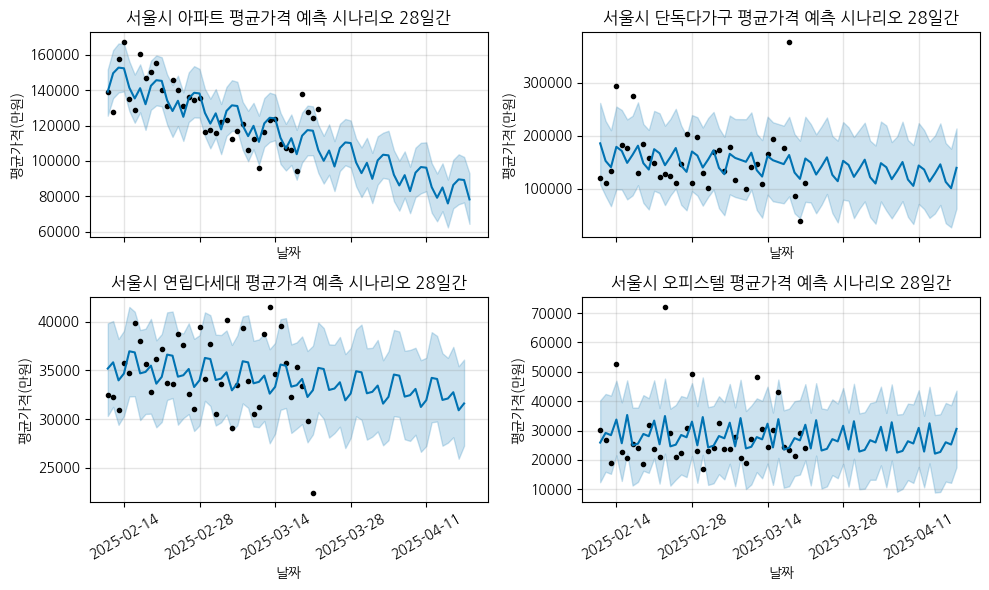

In [16]:
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = "NanumGothic"


fig, ax = plt.subplots(figsize=(10, 6), sharex=True, ncols=2, nrows=2)

for i in range(len(types)):
    model = Prophet()

    # Filter and aggregate data
    total_df2 = total_df[total_df['BLDG_USG'] == types[i]][['CTRT_DAY', 'THING_AMT']]
    result_df = total_df2.groupby('CTRT_DAY')['THING_AMT'].mean().reset_index()
    result_df = result_df.rename(columns={'CTRT_DAY': 'ds', 'THING_AMT': 'y'})

    model.fit(result_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # Proper subplot indexing
    row, col = divmod(i, 2)
    model.plot(forecast, ax=ax[row, col], uncertainty=True)

    ax[row, col].set_title(f"서울시 {types[i]} 평균가격 예측 시나리오 {periods}일간")
    ax[row, col].set_xlabel("날짜")
    ax[row, col].set_ylabel("평균가격(만원)")
    for tick in ax[row, col].get_xticklabels():
        tick.set_rotation(30)

plt.tight_layout()
plt.show()

In [4]:
from prophet import Prophet
from prophet.serialize import model_to_json
import json

total_df = pd.read_csv('/Users/songsooyeoun/Desktop/git_test/streamlit/project1/data/seoul_real_estate.csv')
total_df["CTRT_DAY"] = pd.to_datetime(total_df["CTRT_DAY"], format="%Y-%m-%d")
total_df = total_df[total_df['BLDG_USG'] =='아파트']

cgg_nms = sorted(list(total_df['CGG_NM'].unique()))
periods = 28 # 향후 28일간 예측을 한다고 설정

for cgg_nm in cgg_nms:
    model = Prophet()
    total_df2 = total_df.loc[total_df['CGG_NM']==cgg_nm, ['CTRT_DAY', 'THING_AMT']]
    summary_df = total_df2.groupby('CTRT_DAY')['THING_AMT'].agg('mean').reset_index()
    summary_df = summary_df.rename(columns={'CTRT_DAY':'ds', 'THING_AMT':'y'})
    model.fit(summary_df)

    with open(f'/Users/songsooyeoun/Desktop/git_test/streamlit/project1/ml/model/{cgg_nm}.model.json', 'w') as fout:
        json.dump(model_to_json(model), fout)

16:12:50 - cmdstanpy - INFO - Chain [1] start processing
16:12:50 - cmdstanpy - INFO - Chain [1] done processing
16:12:50 - cmdstanpy - INFO - Chain [1] start processing
16:12:50 - cmdstanpy - INFO - Chain [1] done processing
16:12:50 - cmdstanpy - INFO - Chain [1] start processing
16:12:50 - cmdstanpy - INFO - Chain [1] done processing
16:12:50 - cmdstanpy - INFO - Chain [1] start processing
16:12:50 - cmdstanpy - INFO - Chain [1] done processing
16:12:50 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1] done processing
16:12:51 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1] done processing
16:12:51 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1] done processing
16:12:51 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1] done processing
16:12:51 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1]

In [7]:
from prophet.serialize import model_from_json

models = []

for cgg_nm in cgg_nms:
    print(cgg_nm)
    with open(f'/Users/songsooyeoun/Desktop/git_test/streamlit/project1/ml/model/{cgg_nm}.model.json', 'r') as fin:
        model = model_from_json(json.load(fin))
    models.append(model)
models

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [8]:
future = models[0].make_future_dataframe(periods=periods)
forecast = models[0].predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
62,2025-04-14,153741.298260,109511.393528,217337.610853,153741.288699,153741.308641,9693.662023,9693.662023,9693.662023,9693.662023,9693.662023,9693.662023,0.0,0.0,0.0,163434.960283
63,2025-04-15,151465.038427,86832.089135,202033.499521,151465.028205,151465.049692,-7607.429588,-7607.429588,-7607.429588,-7607.429588,-7607.429588,-7607.429588,0.0,0.0,0.0,143857.608840
64,2025-04-16,149188.778595,104964.490117,214289.154591,149188.767722,149188.790554,10274.914902,10274.914902,10274.914902,10274.914902,10274.914902,10274.914902,0.0,0.0,0.0,159463.693497
65,2025-04-17,146912.518763,101166.485711,206471.160555,146912.507119,146912.531391,9967.051429,9967.051429,9967.051429,9967.051429,9967.051429,9967.051429,0.0,0.0,0.0,156879.570192
66,2025-04-18,144636.258931,90987.686426,199162.325380,144636.246416,144636.272338,2067.586745,2067.586745,2067.586745,2067.586745,2067.586745,2067.586745,0.0,0.0,0.0,146703.845675


## 전체 자치구별 모델 시각화

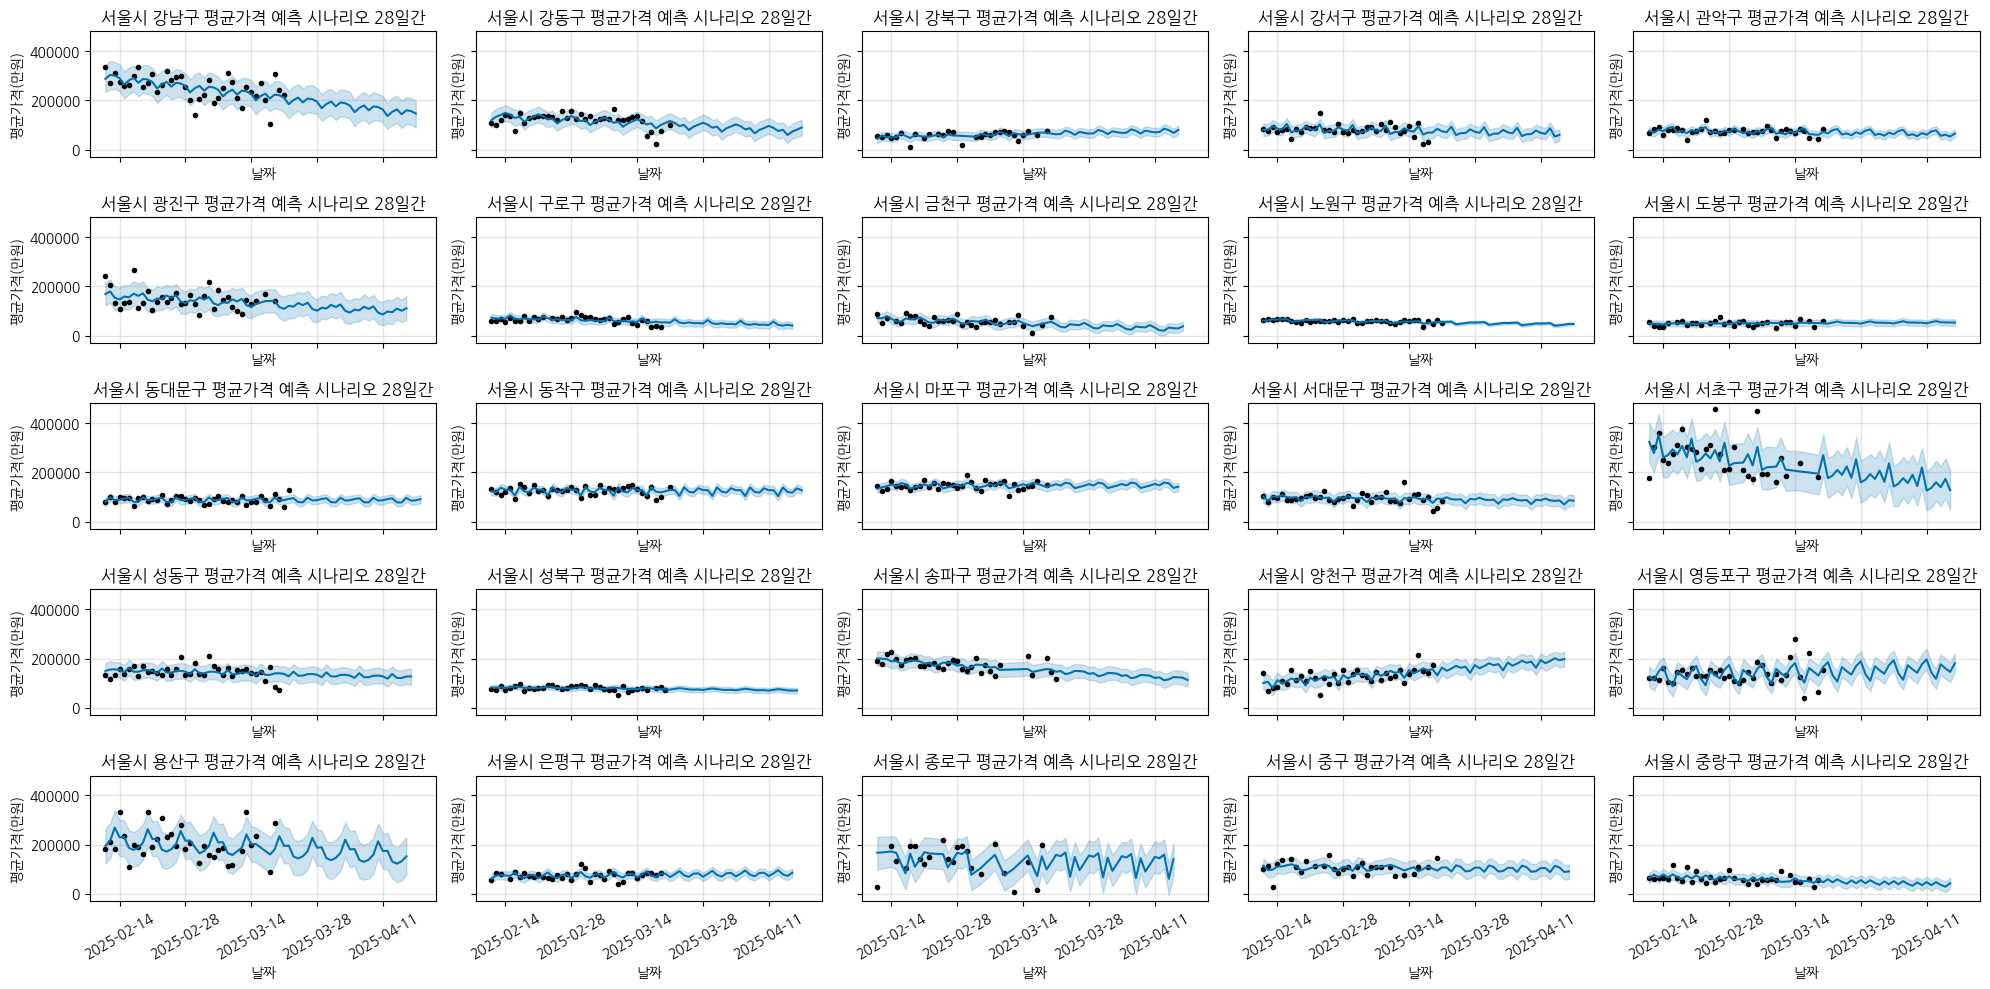

In [10]:
plt.rcParams['font.family'] = "NanumGothic"


periods = 28

fig, ax = plt.subplots(figsize=(20, 10), sharex=True, sharey=True, ncols=5, nrows=5)

for i in range(len(cgg_nms)):  
    future = models[i].make_future_dataframe(periods=periods)
    forecast = models[i].predict(future)

    row, col = divmod(i, 5) 
    models[i].plot(forecast, ax=ax[row, col], uncertainty=True)

    ax[row, col].set_title(f"서울시 {cgg_nms[i]} 평균가격 예측 시나리오 {periods}일간")
    ax[row, col].set_xlabel("날짜")
    ax[row, col].set_ylabel("평균가격(만원)")
    
    for tick in ax[row, col].get_xticklabels():
        tick.set_rotation(30)

plt.tight_layout()
plt.show()
